In [13]:
import pandas as pd
import json
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def read_jsonl(file_path):
    a=[]
    with open(file_path, 'r') as file:
        
        for line in file:
            json_obj = json.loads(line)
            a.append(json_obj)
    return a

def filter_and_replace(value):
    value=value.lower()
    if 'yes' in value:
        return 'yes'
    elif 'no' in value:
        return 'no'
    else:
        return value
    
def MCQ_filter(value):
    if 'A' in value:
        return 'A'
    elif 'B' in value:
        return  'B'
    elif 'C' in value:
        return 'C'
    else:   
        return 'D'


In [5]:
pwd='/home/ubuntu/hallu_team/junkai/Dataset/RLC-bench/answer/Object'

pope_path='/home/ubuntu/kening/kening/kening_results/minicpm-v-v2_5-chat/yesno_result.jsonl'
data=read_jsonl(pope_path)
df=pd.DataFrame(data)
df.head()

,image_id,query_prompt,label,type,mllm_name,response,relation_type
0,1592267,Is the bus driver on bus in this photo? Please...,yes,Yes/No,minicpm-v-v2_5-chat,yes,perception
1,1592267,Is the bus driver off the bus in this photo? P...,no,Yes/No,minicpm-v-v2_5-chat,no,perception
2,2370275,Are the sandwich on plate in this photo? Pleas...,yes,Yes/No,minicpm-v-v2_5-chat,yes,perception
3,2370275,Is the sandwich under the plate in this photo?...,no,Yes/No,minicpm-v-v2_5-chat,no,perception
4,2340467,Is the banner on building in this photo? Pleas...,yes,Yes/No,minicpm-v-v2_5-chat,yes,perception


## 代码绘制yes/no confusion matrix

Accuracy: 0.7046
Precision: 0.6726
F1 Score: 0.7297


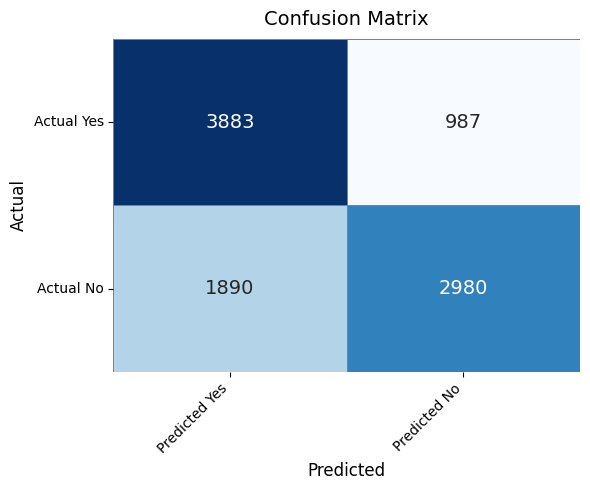

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
cm = confusion_matrix(df['label'], df['response'], labels=['yes', 'no'])

# 计算准确率、精确率和F1分数
accuracy = accuracy_score(df['label'], df['response'])
precision = precision_score(df['label'], df['response'], pos_label='yes')
f1 = f1_score(df['label'], df['response'], pos_label='yes')

# 打印结果
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# 创建一个新的绘图窗口
plt.figure(figsize=(6, 5))

# 使用更高的字体大小和更紧凑的布局
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={"size": 14}, linewidths=0.5, linecolor='gray',
            xticklabels=['Predicted Yes', 'Predicted No'], 
            yticklabels=['Label Yes', 'Label No'])

# 添加标签和标题
plt.ylabel('Label', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, pad=10)

# 调整标签旋转角度
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# 调整布局以适应所有文本
plt.tight_layout()

# 显示图形
plt.show()

[[1205  129  132  269]
 [ 144 1247   95  190]
 [ 156  138 1241  228]
 [ 168   99  100 1409]]


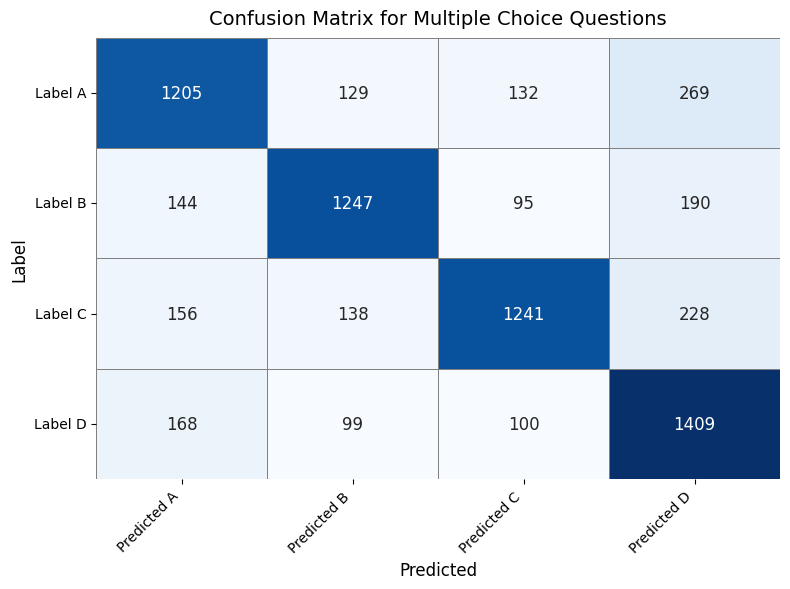

Accuracy: 0.73
Precision: 0.74
F1 Score: 0.73


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

pwd='/home/ubuntu/hallu_team/junkai/Dataset/RLC-bench/answer/Object'

pope_path='/home/ubuntu/kening/kening/kening_results/minicpm-v-v2_5-chat/Multichoice_result.jsonl'
data=read_jsonl(pope_path)
df=pd.DataFrame(data)
df['response'] = df['response'].apply(MCQ_filter)

confusion_mcq = confusion_matrix(df['label'], df['response'], labels=['A', 'B','C','D'])
print(confusion_mcq)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mcq, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 12}, linewidths=0.5, linecolor='gray',
            xticklabels=['Predicted A', 'Predicted B', 'Predicted C', 'Predicted D'],
            yticklabels=['Label A', 'Label B', 'Label C', 'Label D'])

# 添加标签和标题
plt.ylabel('Label', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title('Confusion Matrix for Multiple Choice Questions', fontsize=14, pad=10)

# 调整标签旋转角度
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# 调整布局以适应所有文本
plt.tight_layout()

# 显示图形
plt.show()

# 计算和打印准确率、精确率和F1分数
accuracy = accuracy_score(df['label'], df['response'])
precision = precision_score(df['label'], df['response'], average='weighted')
f1 = f1_score(df['label'], df['response'], average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")


Yes/No 的值相关值
Accuracy: 0.7046
Precision: 0.6726
F1 Score: 0.7297
多选题的confusion matrix:
[[1205  129  132  269]
 [ 144 1247   95  190]
 [ 156  138 1241  228]
 [ 168   99  100 1409]]


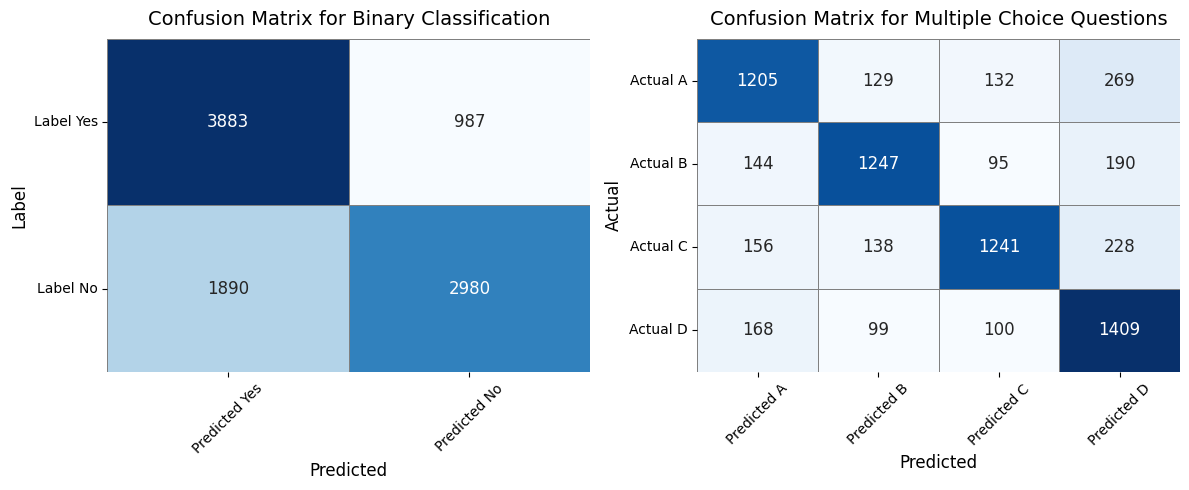

Accuracy: 0.73
Precision: 0.74
F1 Score: 0.73


<Figure size 640x480 with 0 Axes>

In [25]:
import pandas as pd
import json
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def MCQ_filter(value):
    if 'A' in value:
        return 'A'
    elif 'B' in value:
        return  'B'
    elif 'C' in value:
        return 'C'
    else:   
        return 'D'
pope_path='/home/ubuntu/kening/kening/kening_results/minicpm-v-v2_5-chat/yesno_result.jsonl'
data=read_jsonl(pope_path)
df=pd.DataFrame(data)
cm_binary = confusion_matrix(df['label'], df['response'], labels=['yes', 'no'])

accuracy = accuracy_score(df['label'], df['response'])
precision = precision_score(df['label'], df['response'], pos_label='yes')
f1 = f1_score(df['label'], df['response'], pos_label='yes')

# 打印结果
print(f"Yes/No 的值相关值")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# 绘制二分类混淆矩阵
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 12}, linewidths=0.5, linecolor='gray',
            xticklabels=['Predicted Yes', 'Predicted No'],
            yticklabels=['Label Yes', 'Label No'], ax=axes[0])
for spine in axes[0].spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

axes[0].set_ylabel('Label', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_title('Confusion Matrix for Binary Classification', fontsize=14, pad=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# 绘制多分类混淆矩阵
pope_path='/home/ubuntu/kening/kening/kening_results/minicpm-v-v2_5-chat/Multichoice_result.jsonl'
data=read_jsonl(pope_path)
df=pd.DataFrame(data)
df['response'] = df['response'].apply(MCQ_filter)
confusion_mcq = confusion_matrix(df['label'], df['response'], labels=['A', 'B','C','D'])
print('多选题的confusion matrix:')
print(confusion_mcq)
sns.heatmap(confusion_mcq, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 12}, linewidths=0.5, linecolor='gray',
            xticklabels=['Predicted A', 'Predicted B', 'Predicted C', 'Predicted D'],
            yticklabels=['Actual A', 'Actual B', 'Actual C', 'Actual D'], ax=axes[1])

axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_title('Confusion Matrix for Multiple Choice Questions', fontsize=14, pad=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

# 调整布局以适应所有文本
plt.tight_layout()

# 显示图形
plt.show()

# 计算和打印准确率、精确率和F1分数
accuracy = accuracy_score(df['label'], df['response'])
precision = precision_score(df['label'], df['response'], average='weighted')
f1 = f1_score(df['label'], df['response'], average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

plt.savefig("confusion_matrices.pdf", dpi=400,format='pdf')

In [26]:
# 读取数据
pope_path = '/home/ubuntu/kening/kening/kening_results/minicpm-v-v2_5-chat/yesno_result.jsonl'
data = read_jsonl(pope_path)
df = pd.DataFrame(data)

# 处理响应数据
df['response'] = df['response'].apply(MCQ_filter)

# 计算混淆矩阵
cm_binary = confusion_matrix(df['label'], df['response'], labels=['yes', 'no'])

# 计算性能指标
accuracy = accuracy_score(df['label'], df['response'])
precision = precision_score(df['label'], df['response'], pos_label='yes')
f1 = f1_score(df['label'], df['response'], pos_label='yes')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

# 将标签和响应转化为数值
y_true = (df['label'] == 'yes').astype(int)
y_score = (df['response'] == 'yes').astype(int)

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# 绘制AUROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic', fontsize=14)
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

# 保存图形为 PDF
plt.savefig("auroc_curve.pdf", format='pdf')

# 显示图形
plt.show()

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].